# Assignment 1
Create a small neural network in keras that classifies the different types of wine. They labels are the columns called "Class". Using the Functional API

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2022-03-12 16:55:19--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-03-12 16:55:19 (89.6 MB/s) - ‘wines.csv’ saved [10957/10957]



In [4]:
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
import numpy as np
import random
from sklearn.linear_model import Perceptron

In [6]:
# Number of wine classes we need to classify
df.Class.unique()

array([1, 2, 3])

In [7]:
# define X and y
X = df.drop(columns=['Class'])
y = df['Class']

In [8]:
# convert to numpy array
def convert_to_array(input):
  result = input.to_numpy()
  return result

X_ = convert_to_array(X)
y_ = convert_to_array(y)

In [9]:
# standardize X
scaler = StandardScaler()
X_std = scaler.fit_transform(X_)

### FUNCTIONAL API

In [11]:
# build the model
# only one hidden layer in order not to overfit
input_ = keras.layers.Input(shape=X_std.shape[1:])
hidden1 = keras.layers.Dense(18, activation="relu")(input_)
output = keras.layers.Dense(4, activation = "softmax")(hidden1) # (0,4] to include class 1, 2, and 3

model = keras.models.Model(inputs=[input_], outputs=[output])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 18)                252       
                                                                 
 dense_1 (Dense)             (None, 4)                 76        
                                                                 
Total params: 328
Trainable params: 328
Non-trainable params: 0
_________________________________________________________________


In [13]:
# sparse categorical crossentropy for not encoded integer classes
# complie with accuracy metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])

In [14]:
# 20 epochs
# train 80%, test 20%
history = model.fit(X_std, y_, epochs=20, validation_split = 0.2)

Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 2.0236 - accuracy: 0.1127 - val_loss: 1.0190 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 1.8754 - accuracy: 0.1197 - val_loss: 1.0202 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 1.7442 - accuracy: 0.1268 - val_loss: 1.0147 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 1.6251 - accuracy: 0.1549 - val_loss: 1.0098 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 1.5171 - accuracy: 0.1761 - val_loss: 0.9991 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 1.4201 - accuracy: 0.2465 - val_loss: 0.9901 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 1.3308 - accuracy: 0.3169 - val_loss: 0.9854 - val_accuracy: 0.5000
Epoch 8/20
5/5 [=================

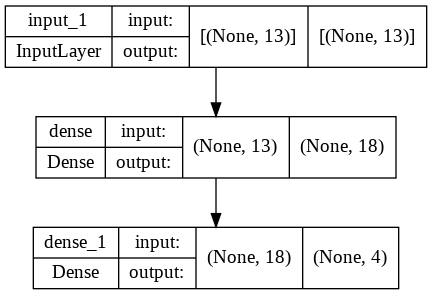

In [15]:
# visualize the model
keras.utils.plot_model(model, "test.png", show_shapes=True)

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [16]:
history.params

{'epochs': 20, 'steps': 5, 'verbose': 1}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

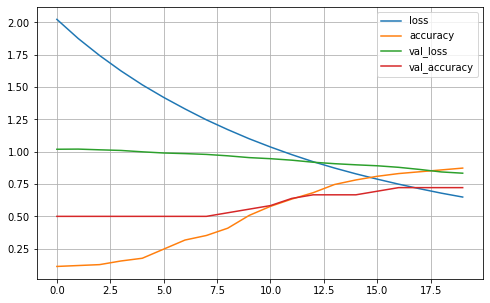

In [18]:
# Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()